# **EXPLORATORY DATA ANAYSIS ON CAR FEATURES**

# **WHAT IS EXPLORATORY DATA ANALYSIS??**

# Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# **# STEP 1 Importing Useful Libraries For EDA**

All the libraries have been imported as pd,np,sns,plt




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)



# Importing Data File and viewing First Five Entries 

CSV (Comma Separated Values) file has been downloaded from Kaggle and imported here

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Checking Null Values, Statistical Summary, Shape and Data Types of the Columns**
 
 To clean the data we check if there are any null values in the data and drop or fill that entry .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.dtypes #checking data types


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
print(df.shape)

(11914, 16)


## **# STEP 2 Dropping Irrelevant Columns**

In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df=df.drop(['Market Category','Engine Fuel Type','Number of Doors'], axis=1)

# **Here the column "Market Category" has more than 25% null values and hence it is of less relevance. Therefore we can drop it**

In [ ]:
df.head(5) #displaying top 5 rows

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **STEP 3 . Renaming Columns**
***Renaming the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Pric***e

In [ ]:
df.rename(columns={'Engine HP':'HP ', 'Engine Cylinders' : 'Cylinders', 'Transmission Type': 'Transmission' , 'Driven Wheels':'Drive Mod', 'highway MPG': 'MPG-H', 'city mpg':'MPG-C' , 'MSRP':'Price'} , inplace=True)

In [ ]:
df.head(5) #displaying top 5 rows

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **STEP 4 .Checking for duplicated entries and null values and removing these values**

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [ ]:
df.duplicated().sum()

792

In [ ]:
df=df.drop_duplicates()  #dropping duplicated rows
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df=df.dropna()  #dropping missing values
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Driven_Wheels    11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [ ]:
print(df.isnull().sum()) 

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **STEP 5 . Plot Box Plots Of columns to check outliers**

# **Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.**

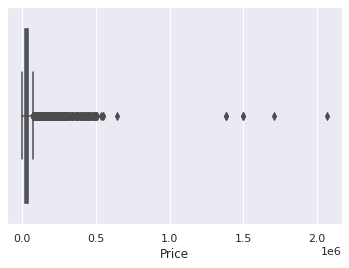

In [ ]:
sns.boxplot(x=df['Price'])

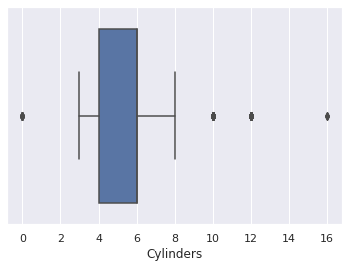

In [ ]:
sns.boxplot(x=df['Cylinders'])

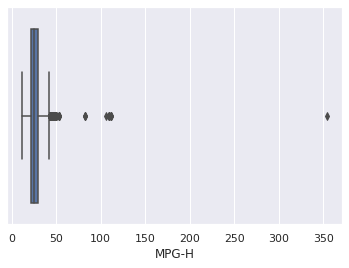

In [ ]:
sns.boxplot(x=df['MPG-H'])

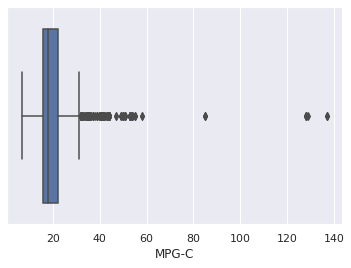

In [ ]:
sns.boxplot(x=df['MPG-C'])

In [ ]:
Q1=df.quantile(0.25)  
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [ ]:

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)


# **STEP 6 .Finding most represented brands and average price values**
Adding new column 'count' in dataset for counting the frequency of car brand.

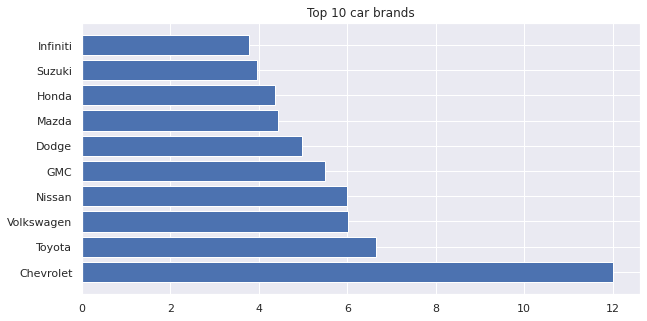

In [ ]:
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())   #percentage of car per brand
popular_labels=counts.index[:10]


# PLOT
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

In [ ]:
 prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# **STEP 7 :Plotting Correlation Matrix**

In [ ]:
#Correlation Matrix
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


# **HIGH CORRELATION BETWEEN**

# Cylinders and HP
# Highway mpg and City mpg

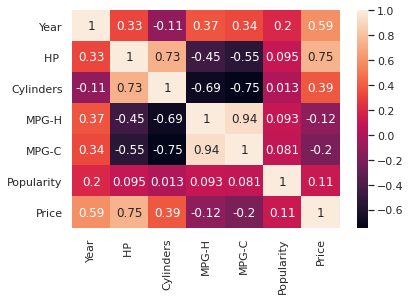

In [ ]:
#Plotting Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

# **Insights:-¶**
Highest correlation is between MPG-H & MPG-C and Cylinders and HP
Highest anti correlation is between Cylinders and MPG-C 


# **STEP 8 Plotting graphs to perform EDA**

Text(0.5, 0, 'Make')

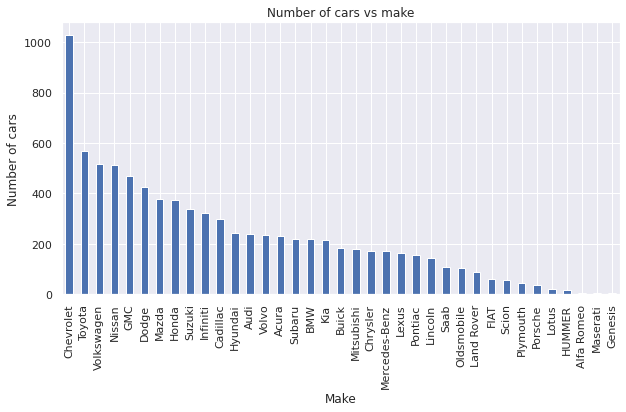

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars vs make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

# **Heat Map**
# **This is a pictorial representation of data where two groups are associated point by point. The individual values that are contained in a matrix are represented as color values in the plot.**


,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


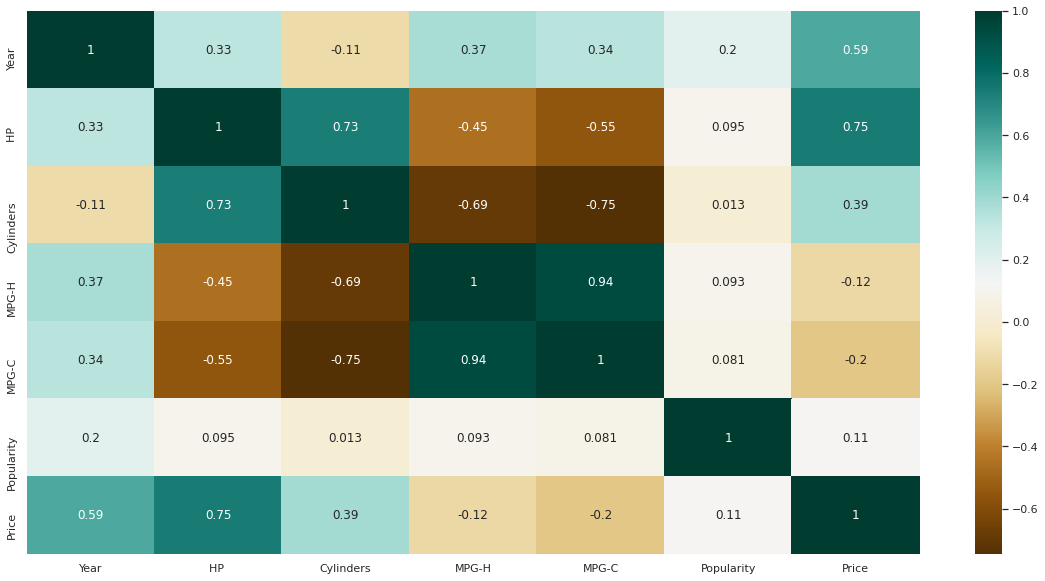

In [ ]:

plt.figure(figsize=(20,10))
heat= df.corr()
sns.heatmap(heat,cmap="BrBG",annot=True)
heat


# **Scatterplot**
# **Scatter plots are used to plot data points on horizontal and vertical axis.**
# **We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Cylinders and Price and we can see the plot below**

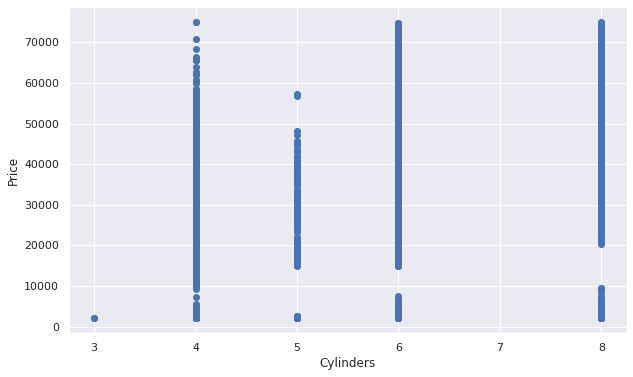

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()

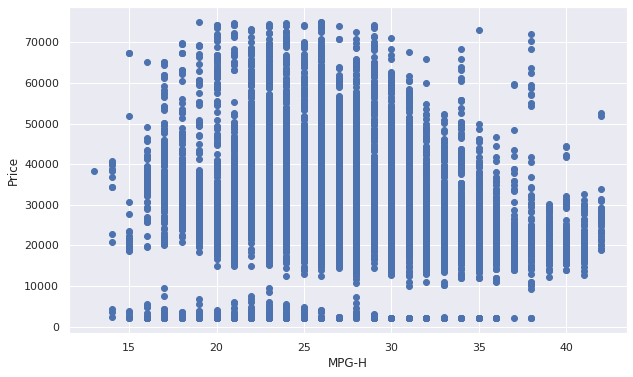

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-H'], df['Price'])
ax.set_xlabel('MPG-H')
ax.set_ylabel('Price')
plt.show()

# **The scatter plots are plotted between MPG-H and Price and we can see the plot below**

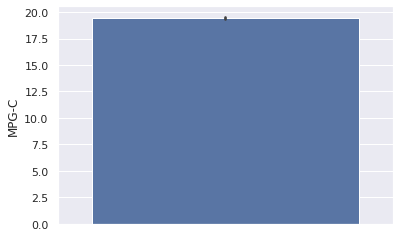

In [ ]:
sns.barplot(y=df['MPG-C'])

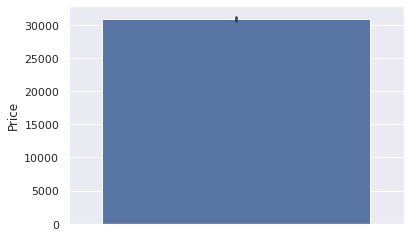

In [ ]:
sns.barplot(y=df['Price'])


# **PLOTTING COMBINED SCATTERPLOTS**
## **For analyzing the data more precisely, we will plot the scatterplot by taking two columns together against 'Price'.**

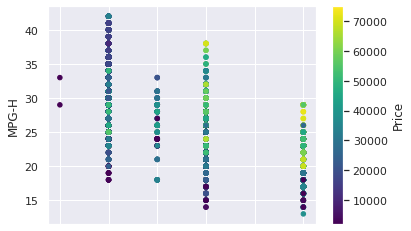

In [ ]:
sc6 = df.plot.scatter(x='Cylinders',
                      y='MPG-H',
                      c='Price',
                      colormap='viridis')

In [ ]:
#Vehicle Style Segment of Cars which are sold the most :

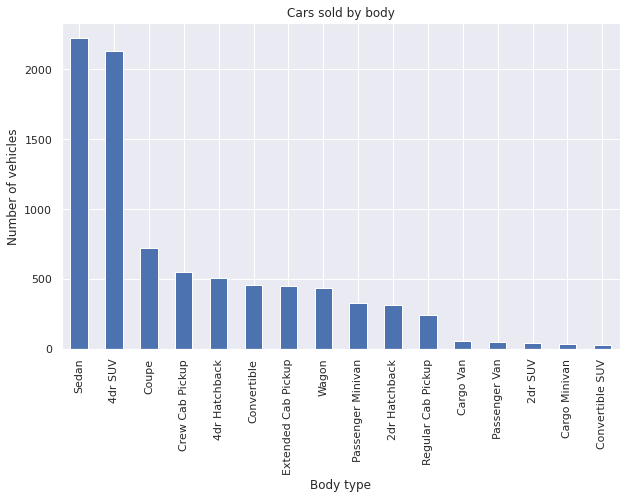

In [ ]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');



# **From the above Chart WE can Conclude that Sedan Cars were the most sold cars**

# **PRICE GROUP**

In [ ]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

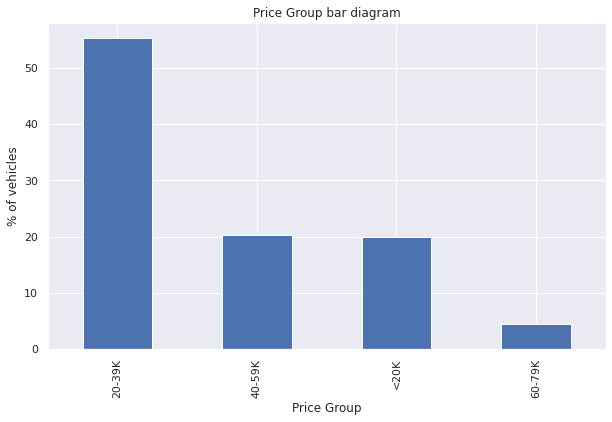

In [ ]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

# **STEP 9 **
Now we will divide the complete data in the Training set and Test set. We will use 80% of data for training and 20% for the testing

#  We use the iris dataset and split it using the ‘train_test_split’ library from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


# Then I load the iris dataset into a variable.

In [ ]:
iris = load_iris()

In [ ]:
#Which I then use to store the data and target value into two separate variables.

In [ ]:
x, y = iris.data, iris.target

# Here I have used the ‘train_test_split’ to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model that is built out of it.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# As you can see here I have passed the following parameters in ‘train_test_split’:



1.  x and y that we had previously defined
2.  test_size: This is set 0.2 thus defining the test size will be 20% of the dataset
3.random_state: it controls the shuffling applied to the data before applying the split. Setting random_state a fixed value will guarantee that the same sequence of random numbers are generated each time you run the code.





In [ ]:
X = df[['Popularity', 'Year',  'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

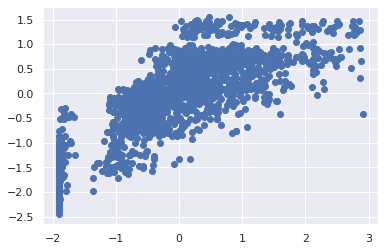

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.5099310340907584
Root Mean Squared Error: 0.6490769631205827
R2 Score: 0.5668350487643341


## **STEP 10**
# **Checking Performance Over Different Algorithms where metrics are R square, RMSE ,MAE **

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

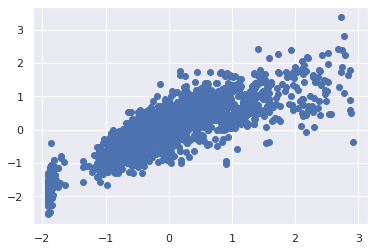

In [ ]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

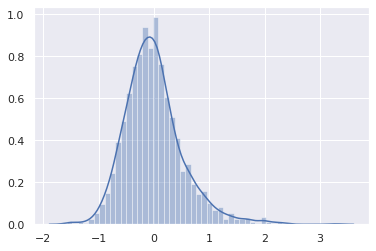

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.39493550010296813
Root Mean Squared Error: 0.5302860286996345
R2 Score: 0.71087790096696


In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

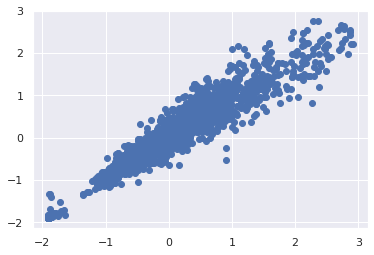

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

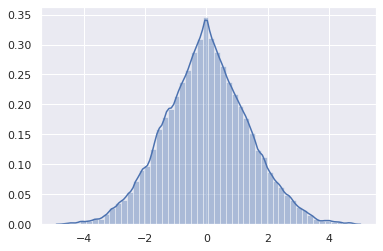

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.19938896060937966
Root Mean Squared Error: 0.2765212680813283
R2 Score: 0.9213827229394055



# **As we got the r square value sufficient i.e. 0.9213827229394055, so we can conclude that our model is performing good**

#        THIS PROJECT IS DONE BY
#                 SYEDA SARA SAMEEN 